### `Importing required libraries`

In [ ]:
# Import all necessary libraries
import seaborn as sns
import numpy as np
from sklearn.metrics import log_loss
import pandas as pd
from scipy.stats import skew,kurtosis,zscore
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from matplotlib import pylab
from pylab import *
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [ ]:
# Load the dataset using pandas
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [ ]:
# Make a copy of the dataset 
df =  train_df



# Get the total number of samples in the dataset using the len() function

In [ ]:
# check the lenght of test and train dataset


print('train data length:',len(train_df))
print('test data length :',len(test_df))

train data length: 18208
test data length : 12140


## Get unique values

In [ ]:
# get unique values in train dataset

for x in train_df.columns:
  print(x,':',len(train_df[x].unique()))


Store_Ratio : 1053
Basket_Ratio : 1993
Category_1 : 12
Store_Score : 10758
Category_2 : 2
Store_Presence : 2832
Score_1 : 3668
Score_2 : 1385
Score_3 : 1591
Score_4 : 12943
time : 12755
popularity : 5


In [ ]:
# get unique values in test dataset

for x in test_df.columns:
  print(x,':',len(test_df[x].unique()))


Store_Ratio : 1010
Basket_Ratio : 1811
Category_1 : 12
Store_Score : 8300
Category_2 : 2
Store_Presence : 2507
Score_1 : 3064
Score_2 : 1275
Score_3 : 1491
Score_4 : 9463
time : 9301


# EDA

In [ ]:
#correlation 
#perfom correlation matrix Using pandas
corr = train_df.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
Store_Ratio,1.00,0.47,0.04,0.60,-0.10,-0.47,-0.45,-0.04,0.62,0.12,-0.06,0.23
Basket_Ratio,0.47,1.00,0.05,0.83,-0.11,-0.82,-0.61,0.28,0.53,0.25,0.10,0.20
Category_1,0.04,0.05,1.00,0.04,-0.14,-0.05,-0.03,0.02,0.04,0.00,-0.01,0.00
Store_Score,0.60,0.83,0.04,1.00,-0.09,-0.72,-0.73,0.15,0.52,0.26,0.08,0.20
Category_2,-0.10,-0.11,-0.14,-0.09,1.00,0.10,0.02,-0.04,-0.04,-0.05,-0.01,-0.03
Store_Presence,-0.47,-0.82,-0.05,-0.72,0.10,1.00,0.57,-0.19,-0.43,-0.22,-0.07,-0.20
Score_1,-0.45,-0.61,-0.03,-0.73,0.02,0.57,1.00,-0.10,-0.47,-0.20,-0.11,-0.16
Score_2,-0.04,0.28,0.02,0.15,-0.04,-0.19,-0.10,1.00,0.03,0.02,-0.00,0.00
Score_3,0.62,0.53,0.04,0.52,-0.04,-0.43,-0.47,0.03,1.00,0.18,0.01,0.18
Score_4,0.12,0.25,0.00,0.26,-0.05,-0.22,-0.20,0.02,0.18,1.00,0.03,0.04


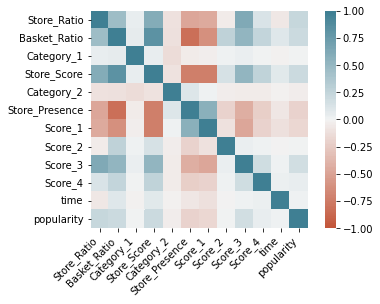

In [ ]:
# Using seaborn
ax = sns.heatmap(corr,
                 vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)


ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');


# SCATTER PLOT


In [ ]:
# perform scatterplot 
# Make a list of all the columns of train dataset
# Loop through the different columns 
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_df[x],train_df[y])
    plt.show()
  

# HISTOGRAM


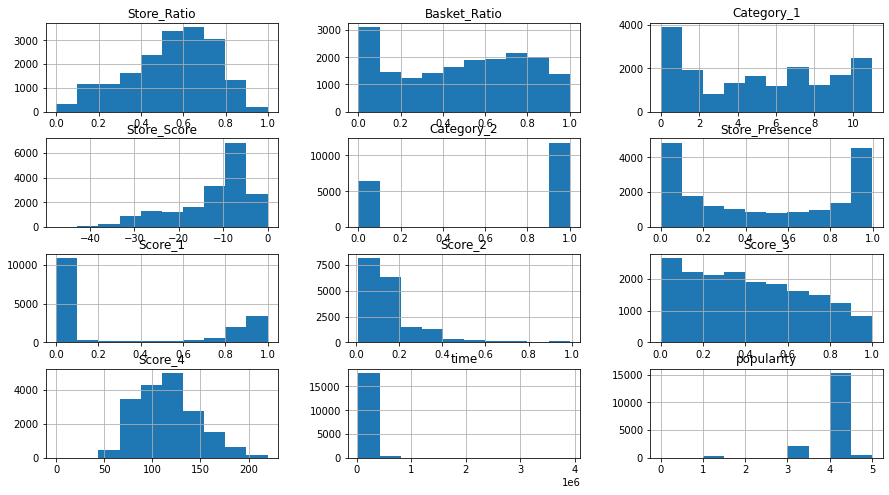

In [ ]:
# perform histogram using pandas for all columns of train dataset


train_df.hist(figsize=(15,8))
plt.show()

# VIF - Variance inflation factor

In [ ]:
#import statsmodels.api
import statsmodels.api as sm


In [ ]:
# creating a dataframe of just numerical values
train_for_vif = train_df.drop('popularity',axis=1)


# target values
target = train_df['popularity']


# numerical values column names
names =  ['Store_Ratio','Basket_Ratio','Category_1','Store_Score','Category_2','Store_Presence','Score_1','Score_2','Score_3','Score_4','time']


#print names
print(names)



['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score', 'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'time']


In [ ]:
# droping rows with from new dataframe empty cells

train_for_vif.columns ==  names[1]


array([False,  True, False, False, False, False, False, False, False,
       False, False])

In [ ]:
# Calculating VIF for each feature.

  # taking one column as target variable

  # taking all other remaining columns as fetaure variable

  # firting the OLS model on y and x


  # geting the r^2 value of results.

  # calculating vif value

for i in range(0, len(names)):
  y =  train_for_vif.loc[:,train_for_vif.columns==names[1]]
  
  x = train_for_vif.loc[:,train_for_vif.columns !=names[1]]
  
  model = sm.OLS(y,x)
  
  results = model.fit()
  
  rsq = results.rsquared
  
  vif = round(1/(1-rsq),2)
  
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))
  

R Square value of Store_Ratio columns is 0.92 keeping all other columns as features
Variance inflation Factor of Store_Ratio columns is 12.13 

R Square value of Basket_Ratio columns is 0.92 keeping all other columns as features
Variance inflation Factor of Basket_Ratio columns is 12.13 

R Square value of Category_1 columns is 0.92 keeping all other columns as features
Variance inflation Factor of Category_1 columns is 12.13 

R Square value of Store_Score columns is 0.92 keeping all other columns as features
Variance inflation Factor of Store_Score columns is 12.13 

R Square value of Category_2 columns is 0.92 keeping all other columns as features
Variance inflation Factor of Category_2 columns is 12.13 

R Square value of Store_Presence columns is 0.92 keeping all other columns as features
Variance inflation Factor of Store_Presence columns is 12.13 

R Square value of Score_1 columns is 0.92 keeping all other columns as features
Variance inflation Factor of Score_1 columns is 12.1

#BOX PLOT


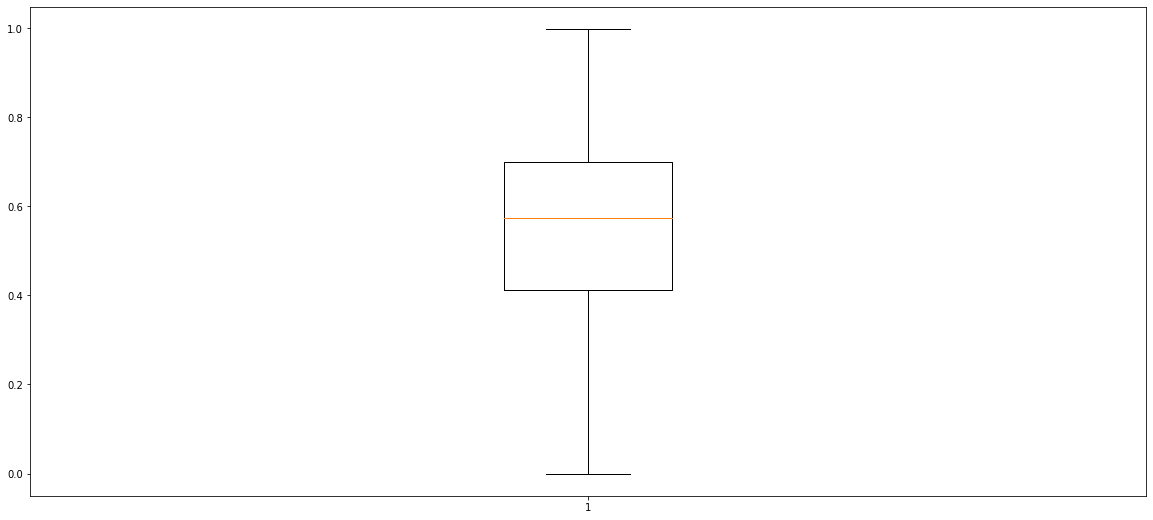

In [ ]:
# Perform a box plot on Store_Ratio 
plt.figure(figsize=(20,9))
plt.boxplot(x= train_df['Store_Ratio'])
plt.show()


From above point plot

There is a increase in store ratio when there is a decrease in store presence.

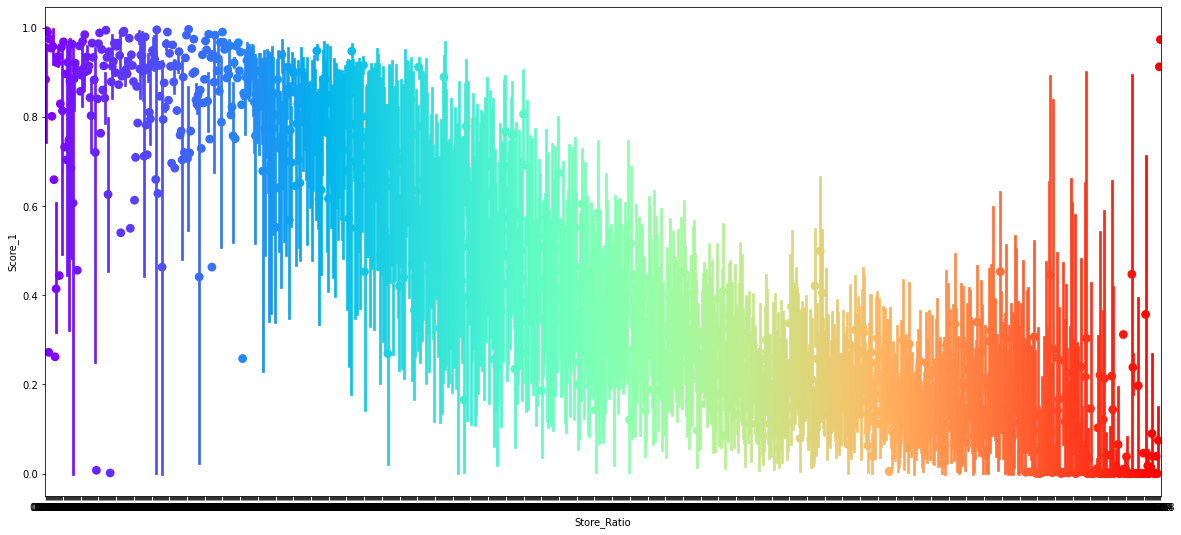

In [ ]:
# Perform point plot between Store Ratio and Score 1
plt.figure(figsize=(20,9))
sns.pointplot(data=train_df,x='Store_Ratio',y='Score_1',palette='rainbow')


From above point plot

There is a decrease in score3 when there is a increase in store ratio.

In [ ]:
#Perform distplot for all the columns in dataset
for column in df.columns:
    print(column)
    # code below
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.distplot(df[column],ax=ax[0],color='blue')
    sns.distplot(df[column],ax=ax[1],color='green')
    plt.show()

# dendrogram



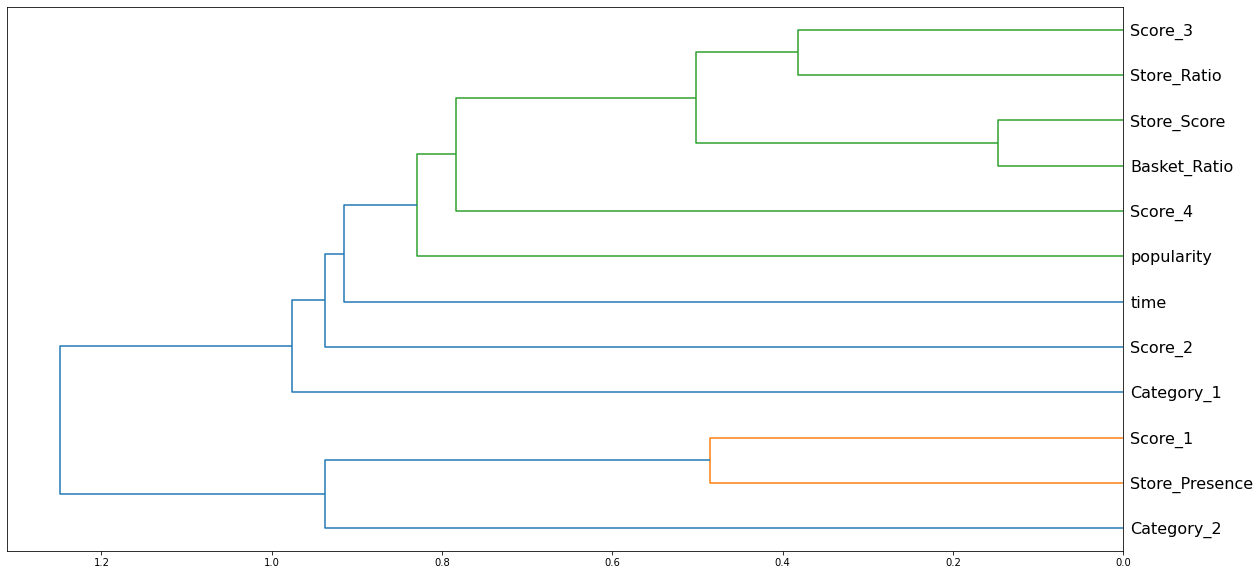

In [ ]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
X = df.dropna()


# import scipy, hierarchy as hc
import scipy
from scipy.cluster import hierarchy as hc


corr = np.round(scipy.stats.spearmanr(X).correlation,4)

corr_condensed = hc.distance.squareform(1-corr)

z = hc.linkage(corr_condensed,method='average')

fig = plt.figure(figsize=(20,10))

dendrogram = hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)

plt.show()


there is on relation between time and popularity

# Preprocessing

In [ ]:
#convert the time column into more columns like hour, month, day, year , minute
train_df['hour'] =  pd.to_datetime(df['time'].astype(int),unit='s').dt.hour

train_df['month'] = pd.to_datetime(df['time'].astype(int),unit='s').dt.month

train_df['day'] = pd.to_datetime(df['time'].astype(int),unit='s').dt.day

train_df['year'] = pd.to_datetime(df['time'].astype(int),unit='s').dt.year

train_df['minute'] = pd.to_datetime(df['time'].astype(int),unit='s').dt.minute



In [ ]:
# drop popularity from train_df and name that variable as y
#drop popularity n time from train dataset
y = df['popularity']

train_df = df.drop(['popularity','time'],1)


# Scaling



## min max scaling


In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar
# import asarray
#  import MinMaxScaler
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
  
  scaler = MinMaxScaler()
  

  df[col] = scaler.fit_transform(df[col])
  
  return df

In [ ]:
# Making a list of the column names to be scaled 

# passing data and column name for scaling
col_X = ['Store_Ratio', 'Basket_Ratio', 'Store_Score', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3', 'Score_4']
X =   train_df
X = scale_data(X,col_X)

## Splitting the data into train and test set

In [ ]:
# split the dataset  into test and train 
# 80% train , 20% test and random state 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
# print X_train shape, y_train shape

X_train.shape, y_train.shape

((14566, 15), (14566,))

In [ ]:
# check for nan value in X_train
np.any(np.isnan(X_train))

False

# Modelling

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Function for calculating all the relevant metrics 
def print_score(m):
    res = classification_report(y_test,m.predict(X_test))
    
    print("Classification Report \n",res)

In [ ]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,_df],axis=0,ignore_index=True)
    

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance',ascending=False).index[:50]
    
    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8,max(6,len(order)*.25)))
    sns.boxplot(data = feature_importance_df,
                x='feature_importance',
                y= 'column',
                order = order,
                ax = ax,
                palette = 'viridis',
                orient = 'h')
    ax.tick_params(axis='x',rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
   
    return fig, ax

 


# LOGISTIC REGRESSION

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        74
           3       0.22      0.01      0.02       444
           4       0.83      1.00      0.91      3030
           5       0.00      0.00      0.00        91

    accuracy                           0.83      3642
   macro avg       0.21      0.20      0.19      3642
weighted avg       0.72      0.83      0.76      3642

CPU times: user 1.67 s, sys: 1.09 s, total: 2.76 s
Wall time: 1.46 s


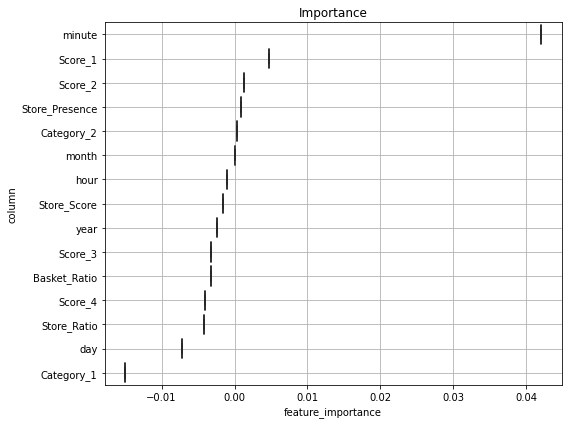

In [ ]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegression
from sklearn.linear_model import LogisticRegression


# Instantiate the model
log_class = LogisticRegression()


# fitting the model on train data

log_class.fit(X_train,y_train)

# print score of the model

print_score(log_class)

# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0],X)



# RANDOM FOREST CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.96      0.35      0.51        74
           3       0.87      0.32      0.47       444
           4       0.88      1.00      0.94      3030
           5       1.00      0.32      0.48        91

    accuracy                           0.88      3642
   macro avg       0.94      0.60      0.68      3642
weighted avg       0.88      0.88      0.86      3642

CPU times: user 3.36 s, sys: 16 ms, total: 3.37 s
Wall time: 3.36 s


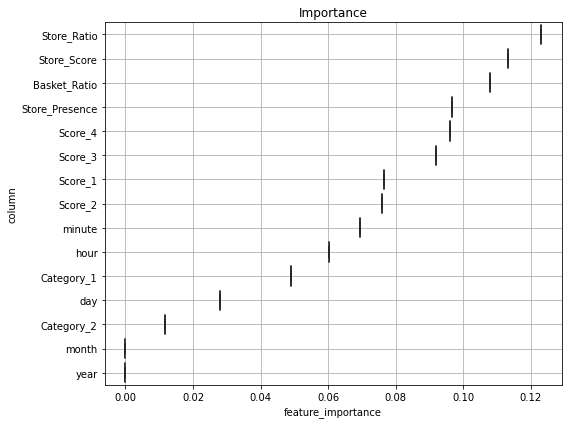

In [ ]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


# Instantiate the model
rf_clf = RandomForestClassifier()


# fitting the model on train data
rf_clf.fit(X_train,y_train)


# print score of the model

print_score(rf_clf)

# visualizing importance of features
fig, ax = visualize_importance(rf_clf.feature_importances_,X)



# ADA BOOST CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.01      0.18      0.01        74
           3       0.00      0.00      0.00       444
           4       0.69      0.34      0.45      3030
           5       0.00      0.00      0.00        91

    accuracy                           0.29      3642
   macro avg       0.34      0.30      0.29      3642
weighted avg       0.57      0.29      0.38      3642

CPU times: user 1.49 s, sys: 24.2 ms, total: 1.52 s
Wall time: 1.51 s


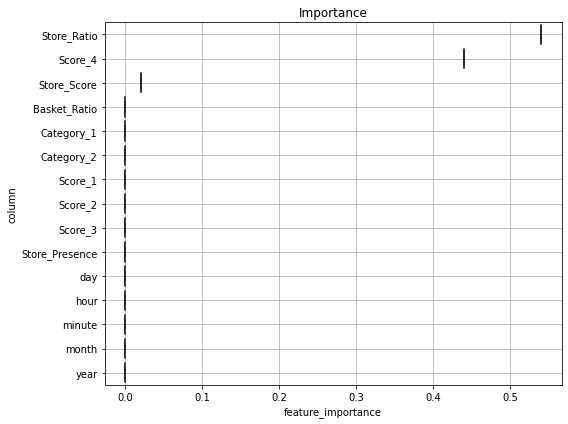

In [ ]:
%%time
# Fit a AdaBoost classifier model to the train dataset

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


# Instantiate the model
Ada_clf = AdaBoostClassifier()


# fitting the model on train data
Ada_clf.fit(X_train,y_train)



# print score of the model

print_score(Ada_clf)

# visualizing importance of features
fig, ax = visualize_importance(Ada_clf.feature_importances_, X)



# SUPORT VECTOR CLASSIFIER

In [ ]:
%%time
# Fit a support vector classifier model to the train dataset

#import SVC
from sklearn.svm import SVC



# Instantiate the model
svc = SVC()



#fit the model on train data

svc.fit(X_train,y_train)
print_score(svc)

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       444
           4       0.83      1.00      0.91      3030
           5       0.00      0.00      0.00        91

    accuracy                           0.83      3642
   macro avg       0.17      0.20      0.18      3642
weighted avg       0.69      0.83      0.76      3642

CPU times: user 5.61 s, sys: 202 ms, total: 5.81 s
Wall time: 5.79 s


# DESISION TREE CLASSICIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.28      0.36      0.31        74
           3       0.45      0.47      0.46       444
           4       0.91      0.89      0.90      3030
           5       0.35      0.37      0.36        91

    accuracy                           0.82      3642
   macro avg       0.60      0.62      0.61      3642
weighted avg       0.82      0.82      0.82      3642

CPU times: user 386 ms, sys: 3.99 ms, total: 390 ms
Wall time: 389 ms


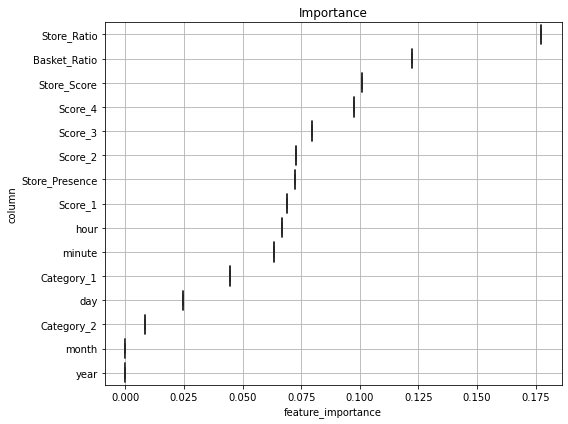

In [ ]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


# Instantiate the model
dt_clf = DecisionTreeClassifier()


# fitting the model on train data

dt_clf.fit(X_train,y_train)

# print score of the model

print_score(dt_clf)


# visualizing importance of features
fig, ax = visualize_importance(dt_clf.feature_importances_,X)



# K NEIGHBOUR CLASSIFIER

In [ ]:
%%time
# Fit a K-Neighbour classifier model to the train dataset

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


# Instantiate the model
knn_clf = KNeighborsClassifier()


# fitting the model on train data
knn_clf.fit(X_train,y_train)


# print score of the model

print_score(knn_clf)


Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.23      0.04      0.07        74
           3       0.37      0.15      0.21       444
           4       0.85      0.96      0.90      3030
           5       0.43      0.10      0.16        91

    accuracy                           0.82      3642
   macro avg       0.38      0.25      0.27      3642
weighted avg       0.77      0.82      0.78      3642

CPU times: user 206 ms, sys: 1 µs, total: 206 ms
Wall time: 207 ms


# GRADIENT BOOSTING CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.63      0.16      0.26        74
           3       0.55      0.11      0.18       444
           4       0.85      0.99      0.91      3030
           5       0.75      0.13      0.22        91

    accuracy                           0.84      3642
   macro avg       0.76      0.48      0.52      3642
weighted avg       0.81      0.84      0.79      3642

CPU times: user 22.6 s, sys: 44.7 ms, total: 22.7 s
Wall time: 24.5 s


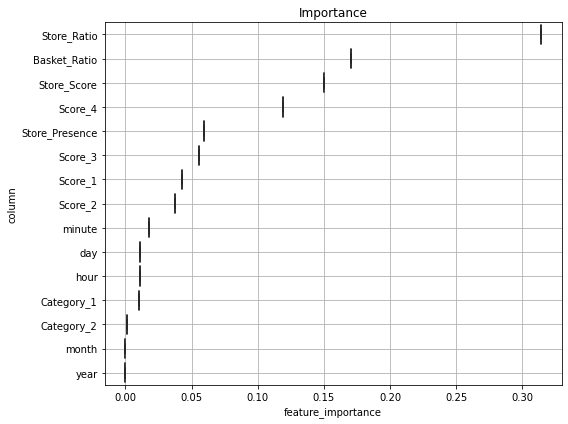

In [ ]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Instantiate the model
GBR_clf = GradientBoostingClassifier()


# fitting the model on train data

GBR_clf.fit(X_train,y_train)

# print score of the model

print_score(GBR_clf)

# visualizing importance of features
fig, ax = visualize_importance(GBR_clf.feature_importances_,X)



# BAGGING CLASSIFIER

In [ ]:
%%time
# Fit a Bagging Classifier model to the train dataset

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier


# Instantiate the model
bg_clf = BaggingClassifier()


# fitting the model on train data
bg_clf.fit(X_train,y_train)


# print score of the model

print_score(bg_clf)


Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.88      0.38      0.53        74
           3       0.56      0.40      0.47       444
           4       0.89      0.96      0.93      3030
           5       0.88      0.32      0.47        91

    accuracy                           0.86      3642
   macro avg       0.84      0.61      0.68      3642
weighted avg       0.85      0.86      0.85      3642

CPU times: user 1.39 s, sys: 0 ns, total: 1.39 s
Wall time: 1.39 s


# VOTING CLASSIFIER

In [ ]:
%%time
# Fit a VotingClassifier model to the train dataset

# Import VotingClassifier
from sklearn.ensemble import VotingClassifier


# list of classifier objects
classifiers = [("knn", knn_clf), ("svc", svc), ("dt", dt_clf), ("rf_clf", rf_clf)]

# Instantiate the model
voting_clf = VotingClassifier(estimators = classifiers,voting='hard')


# fitting the model on train data
voting_clf.fit(X_train,y_train)


# print score of the model

print_score(voting_clf)


Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.35      0.52        74
           3       0.85      0.31      0.46       444
           4       0.87      0.99      0.93      3030
           5       1.00      0.11      0.20        91

    accuracy                           0.88      3642
   macro avg       0.94      0.55      0.62      3642
weighted avg       0.88      0.88      0.85      3642

CPU times: user 9.15 s, sys: 58.7 ms, total: 9.21 s
Wall time: 9.18 s


# XGB CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.83      0.07      0.13        74
           3       0.53      0.06      0.11       444
           4       0.84      0.99      0.91      3030
           5       1.00      0.01      0.02        91

    accuracy                           0.84      3642
   macro avg       0.84      0.43      0.43      3642
weighted avg       0.81      0.84      0.78      3642

CPU times: user 4.59 s, sys: 12.9 ms, total: 4.6 s
Wall time: 4.58 s


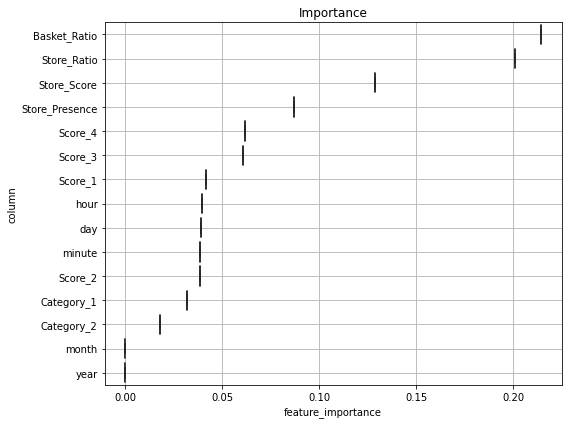

In [ ]:
%%time
# Fit a XGBClassifier model to the train dataset

# Import XGBClassifier
from xgboost import XGBClassifier


# Instantiate the model
xgb_clf = XGBClassifier()


# fitting the model on train data
xgb_clf.fit(X_train,y_train)


# print score of the model

print_score(xgb_clf)

# visualizing importance of features
fig, ax = visualize_importance(xgb_clf.feature_importances_,X)



## Comparing all the model based on metric

In [ ]:
# import metrics, train_test_split


def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    

    for (model,name) in zip(models,names):
      print(name)
      # then predict on the test set
      y_pred =  model.predict(X_test)
      res = classification_report(y_test,y_pred)
      print("Classification Report \n",res)
      print("---------------------------------------------------------------------------------------")
    

In [ ]:
# list of model objects
models= [log_class,rf_clf,Ada_clf,svc, dt_clf, knn_clf, GBR_clf,bg_clf, voting_clf, xgb_clf ]
# list of model names
names = ['logistic', 'rf','AdaBoost', 'svc', 'Dtree','KNN','GBR','bagging','voting','XGB']
# print the comparison of models

compare_models(models,names,X_train,y_train,X_test,y_test)


logistic
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        74
           3       0.22      0.01      0.02       444
           4       0.83      1.00      0.91      3030
           5       0.00      0.00      0.00        91

    accuracy                           0.83      3642
   macro avg       0.21      0.20      0.19      3642
weighted avg       0.72      0.83      0.76      3642

---------------------------------------------------------------------------------------
rf
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.96      0.35      0.51        74
           3       0.87      0.32      0.47       444
           4       0.88      1.00      0.94      3030
           5       1.00      0.32      0.48        91

    accuracy                         

# Hyperparameter tuning




# grid search



In [ ]:
%%time
# Helper function to perform hyper parameter tunning with GridSearchCV
def grid_search(model,grid):
  from sklearn.model_selection import GridSearchCV, train_test_split
  from sklearn.model_selection import KFold
  from sklearn.model_selection import GridSearchCV

  
  cv =KFold(n_splits=5,shuffle=False,random_state=None)

  clf = GridSearchCV(model,grid,cv =cv,n_jobs=1,scoring='f1_macro')
  
  # print clf.score and best_params_
  clf.fit(X_train,y_train)
  print(clf.score(X_train,y_train))
  print(clf.best_params_)

CPU times: user 0 ns, sys: 7 µs, total: 7 µs
Wall time: 11.4 µs


In [ ]:
%%time
# create  parameters dict in list for tunning
log_para_grid = {
    'C':10.0 **np.arange(-2,3),
    'penalty':['l1','l2']
    }

# passing data for hyper parameter tunning with Gridsearchcv    

grid_search(log_class,log_para_grid)


0.18859601500979314
{'C': 1.0, 'penalty': 'l2'}
CPU times: user 31.6 s, sys: 21.6 s, total: 53.2 s
Wall time: 34.8 s


# NOTE : you can use any one of RandomizedSearchCv or GridSearchCV, both works fine.

# RamdomizedSearchCV

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  # Fit the random search model
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=10,cv=3,verbose=2,random_state=42)
  
  #fit on train
  random.fit(X_train,y_train)
  # print best_params_
  print(random.best_params_)
  

In [ ]:
%%time
# create parameters dict for tunning
rf_para_grid = {'n_estimators': list(range(150, 301, 50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train,y_train,param_grid=rf_para_grid)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   5.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   4.9s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   4.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total tim

In [ ]:
%%time
# create parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [x for x in range(200,351, 50)], 
 'learning_rate' : [0.01, 0.1, 0.2],
 'max_depth': [x for x in range(5,7)], 
 'min_samples_split': [x for x in range(2,6)]
}

# passing data for hyper parameter tunning with Randomized search cv

random_Search(GradientBoostingClassifier(),X_train,y_train,param_grid=GBR_para_grid)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.2, max_depth=6, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END learning_rate=0.2, max_depth=6, min_samples_split=2, n_estimators=200; total time= 1.0min
[CV] END learning_rate=0.2, max_depth=6, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=250; total time= 1.0min
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=250; total time=  58.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=250; total time= 1.2min
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=4, n_estimators=250; total time= 1.2min
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=4, n_estimators=250; total time= 1.2min
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=4, n_estimators=250; total time=  57.3s
[CV] END learning_rate=0.2, max_depth=6, min_sam

In [ ]:
%%time
# create parameters dict for tunning
knn_para_grid = {
                  'leaf_size' :list(range(3,15,2)),
                  'n_neighbors' : list(range(10,30))
              }

# passing data for hyper parameter tunning with Randomized search cv


random_Search(KNeighborsClassifier(),X_train,y_train,param_grid=knn_para_grid)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ........................leaf_size=7, n_neighbors=14; total time=   0.4s
[CV] END ........................leaf_size=7, n_neighbors=14; total time=   0.3s
[CV] END ........................leaf_size=7, n_neighbors=14; total time=   0.3s
[CV] END ........................leaf_size=7, n_neighbors=17; total time=   0.4s
[CV] END ........................leaf_size=7, n_neighbors=17; total time=   0.3s
[CV] END ........................leaf_size=7, n_neighbors=17; total time=   0.3s
[CV] END ........................leaf_size=3, n_neighbors=14; total time=   0.4s
[CV] END ........................leaf_size=3, n_neighbors=14; total time=   0.5s
[CV] END ........................leaf_size=3, n_neighbors=14; total time=   0.6s
[CV] END ........................leaf_size=7, n_neighbors=25; total time=   0.6s
[CV] END ........................leaf_size=7, n_neighbors=25; total time=   0.5s
[CV] END ........................leaf_size=7, n_

In [ ]:
%%time
# create  parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [3,5,7,9],
           "min_samples_leaf":[1,2,3,4],
           "max_features":["auto","log2","sqrt"]
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(DecisionTreeClassifier(),X_train,y_train,param_grid=DTR_para_grid)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=be

In [ ]:
%%time
# create  parameters dict for tunning
Ada_para_grid = {
                  'n_estimators' :[100, 200, 300],
                  'learning_rate' : [0.001, 0.01, 0.1, 1.0]
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(AdaBoostClassifier(),X_train,y_train,param_grid=Ada_para_grid)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................learning_rate=1.0, n_estimators=200; total time=   4.0s
[CV] END ................learning_rate=1.0, n_estimators=200; total time=   3.3s
[CV] END ................learning_rate=1.0, n_estimators=200; total time=   4.6s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   4.3s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   1.6s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   1.7s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   1.7s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   1.7s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   1.7s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   4.9s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   4.9s
[CV] END ................learning_rate=0.1, n_es

In [ ]:
%%time
# create  parameters dict for tunning
XGB_para_grid = {"learning_rate"    : [0.05, 0.10] ,
 "max_depth"        : [ 3, 4, 5],
 "min_child_weight" : [ 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1],
 "colsample_bytree" : [ 0.3, 0.4] }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(XGBClassifier(),X_train,y_train,param_grid=XGB_para_grid)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   2.1s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   2.1s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   2.1s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7; total time=   3.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7; total time=   3.0s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7; total time=   3.0s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3; total time=   1.7s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3; total time=   1.7s
[CV] END colsample_bytree=0

# Using the tuned parameters and training the models

## Gradient Boosting Classifier

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.68      0.38      0.49        74
           3       0.62      0.37      0.46       444
           4       0.89      0.97      0.93      3030
           5       0.74      0.32      0.45        91

    accuracy                           0.87      3642
   macro avg       0.79      0.61      0.66      3642
weighted avg       0.85      0.87      0.85      3642

CPU times: user 1min 47s, sys: 163 ms, total: 1min 47s
Wall time: 1min 47s


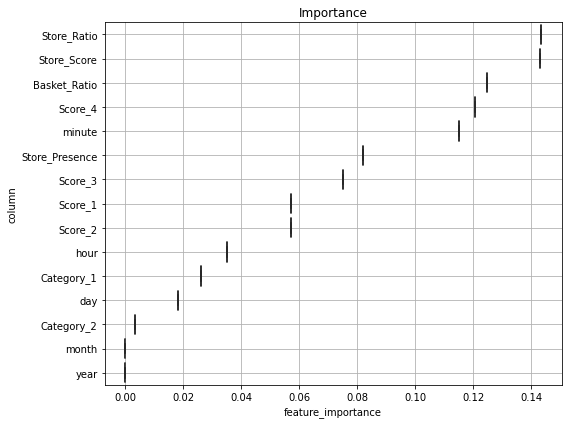

In [ ]:
%%time

# Instantiate the model
GBR_clf = GradientBoostingClassifier(**{'n_estimators':300,'min_samples_split':5,'max_depth':6,'learning_rate':0.2})


# fitting the model on train data

GBR_clf.fit(X_train,y_train)

# print score of the model
print_score(GBR_clf)

# visualizing importance of features
fig, ax = visualize_importance(GBR_clf.feature_importances_,X)



## Random Forest Classifier

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.35      0.52        74
           3       0.88      0.31      0.46       444
           4       0.88      1.00      0.93      3030
           5       1.00      0.32      0.48        91

    accuracy                           0.88      3642
   macro avg       0.95      0.60      0.68      3642
weighted avg       0.89      0.88      0.86      3642

CPU times: user 7.04 s, sys: 20.8 ms, total: 7.07 s
Wall time: 7.94 s


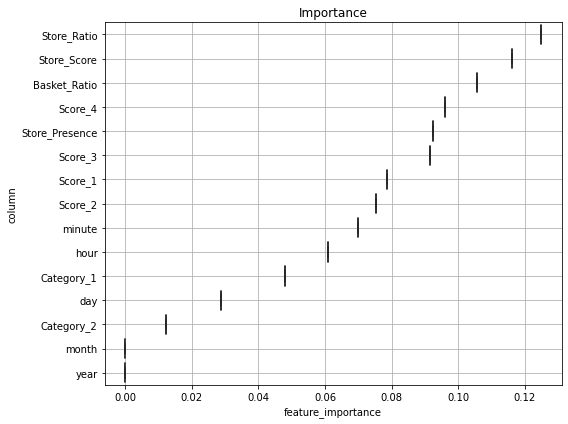

In [ ]:
%%time

# Instantiate the model
rf_clf = RandomForestClassifier(**{'n_estimators':200,'min_samples_split':2,'min_samples_leaf':1,'max_features':'sqrt'})


# fitting the model on train data

rf_clf.fit(X_train,y_train)

# print score of the model
print_score(rf_clf)


# visualizing importance of features
fig, ax = visualize_importance(rf_clf.feature_importances_,X)



## Adaboost Classifier

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       444
           4       0.83      1.00      0.91      3030
           5       0.00      0.00      0.00        91

    accuracy                           0.83      3642
   macro avg       0.37      0.40      0.38      3642
weighted avg       0.69      0.83      0.76      3642

CPU times: user 6.97 s, sys: 55.9 ms, total: 7.03 s
Wall time: 7.02 s


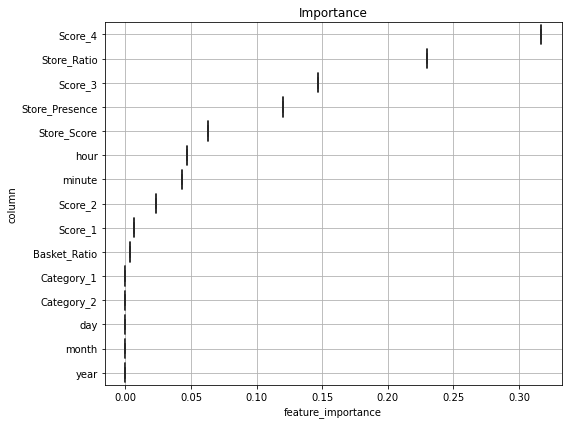

In [ ]:
%%time

# Instantiate the model
Ada_clf = AdaBoostClassifier(**{'n_estimators':300,'learning_rate':0.01})


# fitting the model on train data

Ada_clf.fit(X_train,y_train)


# print score of the model
print_score(Ada_clf)


# visualizing importance of features
fig, ax = visualize_importance(Ada_clf.feature_importances_,X)



### Now working with the test dataset provided

In [ ]:
# preparing test data as similarly as done for train data before.
test_df['hour'] = pd.to_datetime(test_df['time'].astype(int),unit='s').dt.hour

test_df['month'] = pd.to_datetime(test_df['time'].astype(int),unit='s').dt.month

test_df['day'] = pd.to_datetime(test_df['time'].astype(int),unit='s').dt.day

test_df['year'] = pd.to_datetime(test_df['time'].astype(int),unit='s').dt.year

test_df['minute'] = pd.to_datetime(test_df['time'].astype(int),unit='s').dt.minute

test_df = test_df.drop(['time'],1)


In [ ]:
X_test = test_df

In [ ]:
# check columns of test data

X_test.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'hour', 'month', 'day', 'year', 'minute'],
      dtype='object')

In [ ]:
# passing test data for scaling
col_X_test = ['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4']
X_test = scale_data(X_test,col_X_test)



In [ ]:
# Perforn the prediction on the test dataset
y_predicted = voting_clf.predict(X_test)




In [ ]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)


In [ ]:
# predicted values in dataframe

predictions.head()

,0
0,4
1,4
2,4
3,4
4,4


### CONCLUSION

We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.
store ratio is most important data in the dataset.
we used  voting classifier for prediction